In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
# from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
directory = '/content/drive/MyDrive/static-words'

In [ ]:
dict_labels = {
    'Bus':0,
    'CalmDown':1,
    'Car':2,
    'Church':3,
    'Family':4,
    'Father':5,
    'Fine':6,
    'Hungry':7,
    'IHateYou':8,
    'Key':9,
    'Love':10,
    'Mother':11,
    'Pray':12,
    'okay':13
}

In [ ]:
images = []
labels = []
for label in os.listdir(directory):
    label_path = os.path.join(directory, label)
    for img in os.listdir(label_path):
        image_path = os.path.join(label_path, img)
        img = load_img(image_path, target_size=(96, 96))
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
        labels.append(dict_labels[label])

In [ ]:
images = np.array(images)
labels = np.array(labels)

In [ ]:
print("Shape of data: {}".format(images.shape))

Shape of data: (19516, 96, 96, 3)


In [ ]:
labels = to_categorical(labels, num_classes = 14)

In [ ]:
images, labels = shuffle(images, labels)

In [ ]:
# images = images / 255.0

In [ ]:
# split the data into train and test data
# train-size: 80%
# test/val-size: 20%
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [ ]:
print("Training images shape: {} || Training labels shape: {}".format(x_train.shape, y_train.shape))
print("Test images shape: {} || Test labels shape: {}".format(x_test.shape, y_test.shape))

Training images shape: (15612, 96, 96, 3) || Training labels shape: (15612, 14)
Test images shape: (3904, 96, 96, 3) || Test labels shape: (3904, 14)


In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(14, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 16)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        4640      
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 32)        9248      
                                                        

In [ ]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# set callbacks
callback = EarlyStopping(
    monitor='loss',
    patience=3
)

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)

In [ ]:
# fit the train data into the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    callbacks=[callback],
    validation_data=(x_test, y_test)
)

Epoch 1/20
488/488 [==============================] - 20s 17ms/step - loss: 0.1615 - accuracy: 0.9466 - val_loss: 4.2212e-05 - val_accuracy: 1.0000
Epoch 2/20
488/488 [==============================] - 8s 16ms/step - loss: 7.0614e-07 - accuracy: 1.0000 - val_loss: 4.0098e-05 - val_accuracy: 1.0000
Epoch 3/20
488/488 [==============================] - 8s 16ms/step - loss: 1.5597e-07 - accuracy: 1.0000 - val_loss: 2.2608e-05 - val_accuracy: 1.0000
Epoch 4/20
488/488 [==============================] - 8s 17ms/step - loss: 8.1847e-08 - accuracy: 1.0000 - val_loss: 1.5921e-05 - val_accuracy: 1.0000
Epoch 5/20
488/488 [==============================] - 8s 16ms/step - loss: 5.0755e-08 - accuracy: 1.0000 - val_loss: 1.0872e-05 - val_accuracy: 1.0000
Epoch 6/20
488/488 [==============================] - 8s 16ms/step - loss: 5.1317e-08 - accuracy: 1.0000 - val_loss: 7.0178e-06 - val_accuracy: 1.0000
Epoch 7/20
488/488 [==============================] - 8s 16ms/step - loss: 3.7834e-08 - accuracy:

In [ ]:
len(history.history['loss'])

12

In [ ]:
y_pred_custom = model.predict(x_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_custom, axis=1))
acc*100

100.0

In [ ]:
# save the model
model.save('wordsNet-01.h5')

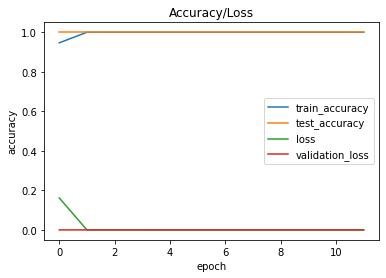

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy/Loss")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy','test_accuracy','loss', 'validation_loss'])
plt.show()

# mobileNet

In [ ]:
mobnet = MobileNetV2(input_shape=(96,96,3), include_top=False, weights='imagenet', pooling='avg')
mobnet.trainable=False

In [ ]:
mobnet_inputs = mobnet.inputs
dense_layer = tf.keras.layers.Dense(256, activation='relu')(mobnet.output)
output_layer = tf.keras.layers.Dense(14, activation='softmax')(dense_layer)
mobnet_model01 = tf.keras.Model(inputs=mobnet_inputs, outputs=output_layer)

In [ ]:
# compile the model
mobnet_model01.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# fit the train data into the model
history_mobnet = mobnet_model01.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=20,
    callbacks=[callback],
    validation_data=(x_test, y_test)
)

Epoch 1/20
488/488 [==============================] - 30s 35ms/step - loss: 0.0223 - accuracy: 0.9952 - val_loss: 1.2531e-04 - val_accuracy: 1.0000
Epoch 2/20
488/488 [==============================] - 16s 32ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 3.2495e-04 - val_accuracy: 0.9997
Epoch 3/20
488/488 [==============================] - 16s 33ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 4/20
488/488 [==============================] - 16s 33ms/step - loss: 8.5142e-04 - accuracy: 0.9997 - val_loss: 5.1210e-04 - val_accuracy: 0.9997
Epoch 5/20
488/488 [==============================] - 16s 32ms/step - loss: 2.5086e-05 - accuracy: 1.0000 - val_loss: 2.0395e-04 - val_accuracy: 0.9997
Epoch 6/20
488/488 [==============================] - 16s 32ms/step - loss: 2.4907e-06 - accuracy: 1.0000 - val_loss: 2.1343e-04 - val_accuracy: 0.9997
Epoch 7/20
488/488 [==============================] - 16s 32ms/step - loss: 9.2635e-07 - accuracy: 1.000

In [ ]:
mobnet_model01.save('mobnet_model01.h5')